In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
police_arrest = pd.read_csv("police_arrest.csv")

# Data Set Description and Metric

<p>For my dataset, I decided to analyze the police arrests in all of the neighborhoods within Pittsburgh. In regards to our overall metric, certain analytics of police arrests in certain neighborhoods can attribute to the overall safety in said neghborhoods.
    
There are many arguments that could be said about analyzing police arrests in certain neighborhoods. One could argue that if there are more police arrests, it should be safer as crime is caught. But from another point of view, one could argue that if there are more police arrests, there is more crime, which could make it less safe.
    
The data set from WPRDC contains police report information dating all the way back to September of 2016 and is still being updated daily. So in regards to our metric, the analyzation of this data will only be in regards from 2016 to present day.</p>

In [3]:
police_arrest

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54451,2046365,22036439,57.0,M,W,2022-03-12T01:31:00,"3800 Block Forbes AV Pittsburgh, PA 15213",2706 Terroristic Threats. / 5503 Disorderly Co...,"3800 Block Forbes AV Pittsburgh, PA 15213",Central Oakland,4,405.0,3.0,3.0,-79.956709,40.441522
54452,2046366,22036444,28.0,F,B,2022-03-14T08:50:00,"600 Block First AV Pittsburgh, PA 15219",2701 Simple Assault.,"7000 Block Campania AV Pittsburgh, PA 15206",Lincoln-Lemington-Belmar,5,1201.0,9.0,2.0,-79.893752,40.474786
54453,2046367,22036462,29.0,M,B,2022-03-12T02:51:00,"1600 Block Concordia ST Pittsburgh, PA 15210",2706 Terroristic Threats. / 3502 Burglary. / 3...,"1600 Block Leolyn ST Pittsburgh, PA 15210",Carrick,3,2902.0,NaN,NaN,0.000000,0.000000
54454,2046368,22036468,36.0,M,W,2022-03-12T03:08:00,"600 Block Smithfield ST Pittsburgh, PA 15222",9501 Bench Warrant,"600 Block Smithfield ST Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-79.997409,40.441533


# Data Set Analysis

<p>The data set above covers police incident reports in the city of Pittsburgh. The datafram includes the age, gender, and race of the person commiting the crime as well as the arrest time and arrest location. More importantly, the dataset also includes the offense of the crime and the neighborhood the crime took place with the exact location. This data will be analyzed in order to find the safest neighborhood in Pittsburgh based on crime rates</p>

<p>First, let's look at something simple, like the amount of arrests that has occured in each neighborhood</p>

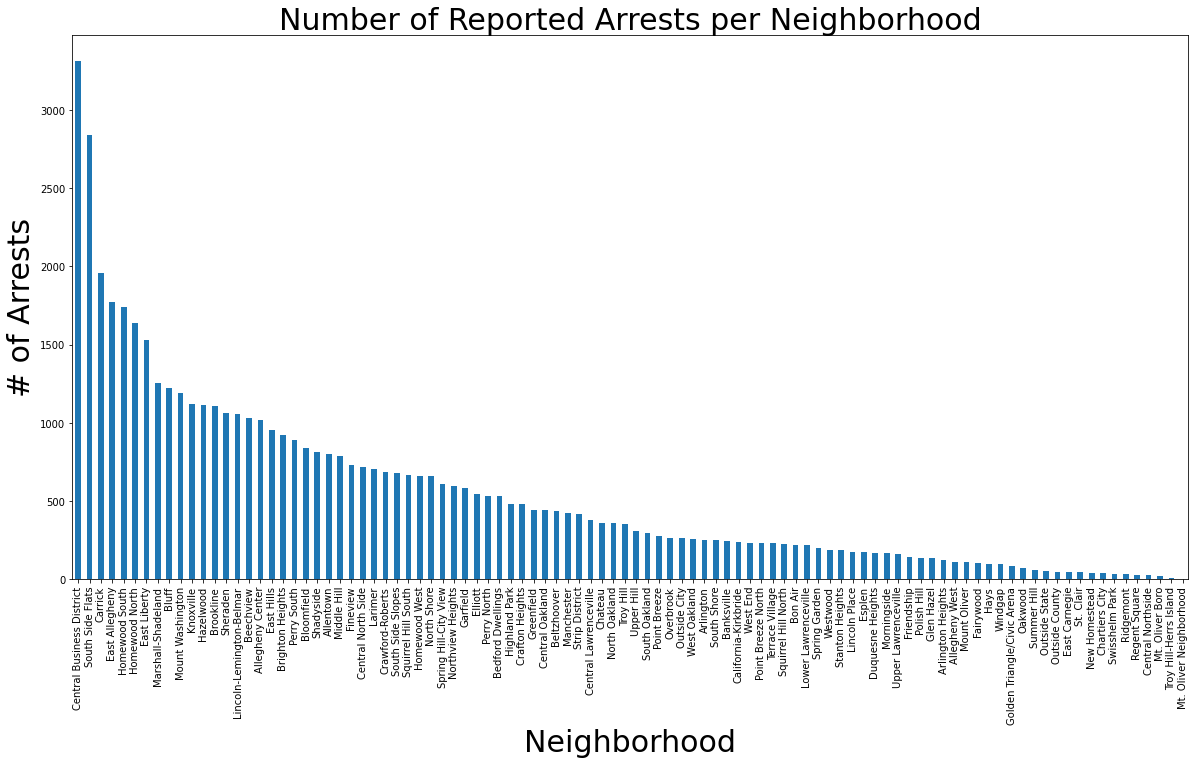

In [4]:
police_arrest["INCIDENTNEIGHBORHOOD"].value_counts().plot(kind="bar", figsize = (20,10))
plt.title("Number of Reported Arrests per Neighborhood", fontsize = 30);
plt.xlabel("Neighborhood", fontsize = 30);
plt.ylabel("# of Arrests", fontsize = 30);


# Graph Analysis

<p>Based on the bar graph, it seems that the Central Business District neighborhood as the most arrests with over 3000 with neighborhoods such as South Side, Carrick, and East Allegheny below it ranging from 1000 - 2600 arrests. Neighborhoods such as Mt. Oliver and Toy-Hill have the least amount of arrest which number close to 0. However, there aren't many claims we can make with this data, so let's dive deeper.<p/>

Text(0.5, 0, 'Neighborhoods')

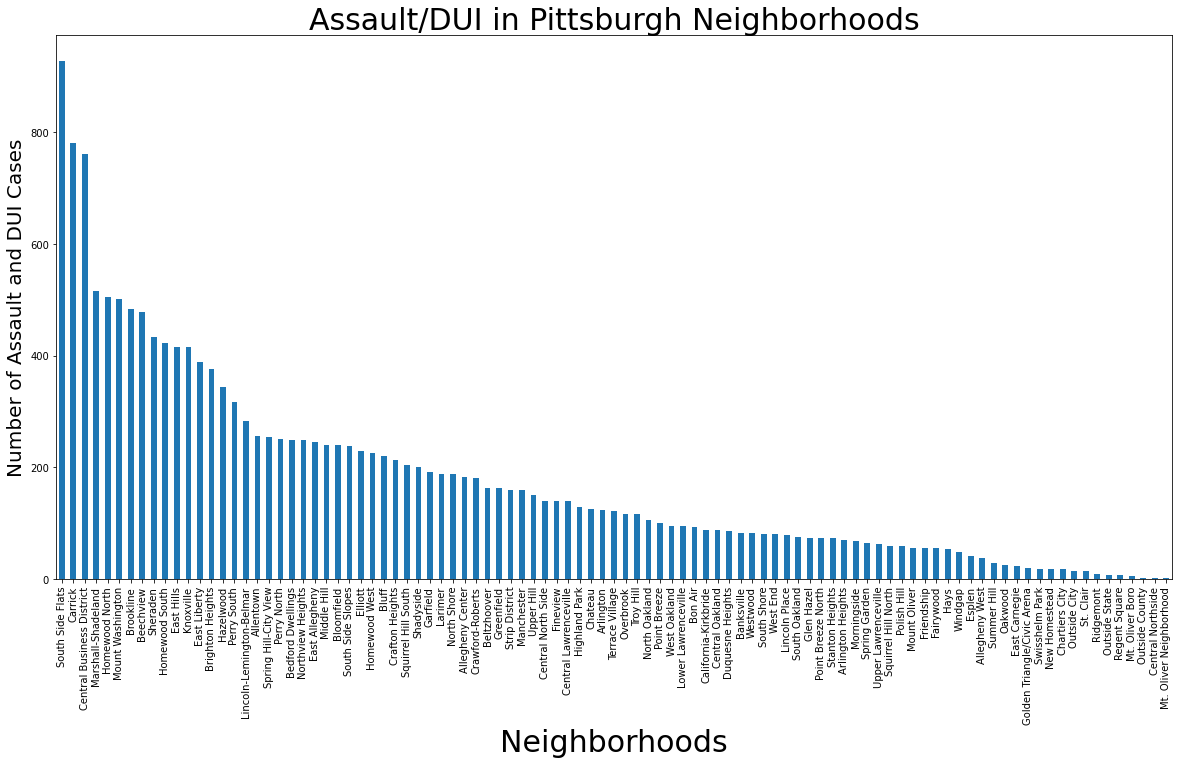

In [15]:
filter1 = police_arrest["OFFENSES"].str.contains("dui", case = False, na = False)
filter2 = police_arrest["OFFENSES"].str.contains("assault", case = False, na = False)
pd = police_arrest[filter1 | filter2]
pd["INCIDENTNEIGHBORHOOD"].value_counts().plot(kind="bar", figsize = (20,10))
plt.title("Assault/DUI in Pittsburgh Neighborhoods", fontsize = 30)
plt.ylabel('Number of Assault and DUI Cases', fontsize = 20)
plt.xlabel('Neighborhoods', fontsize = 30)

# Graph Analysis 2

<p>I created a two filters and plotted the data. As you can see, the bar graph consists of data that shows the amount of assault cases and DUI's in each neighborhood in the city of Pittsburgh. These two metrics are most essential to determining what neighborhood is the safest plan to reside in. Instead of just analyzing the amount of arrest, we can analyze the amount of DUI's and assault cases to determine which neighborhood is the safest. From the bar graph, we can see that many neighborhoods in Pittsburgh have under 50 assault cases and DUI's since September of 2016, which make then plausible of being relatively safe based on arrest data.</p>

<p>However, the exact number of assault and DUI cases in these neighborhoods can't be analyzed effectively, as we don't take into account the amount of arrest. We must find the percentage of arrests that are assaults and DUI cases to better determine how safe each neighborhood in Pittsburgh actually is.</p>

Text(0.5, 0, 'Neighborhood')

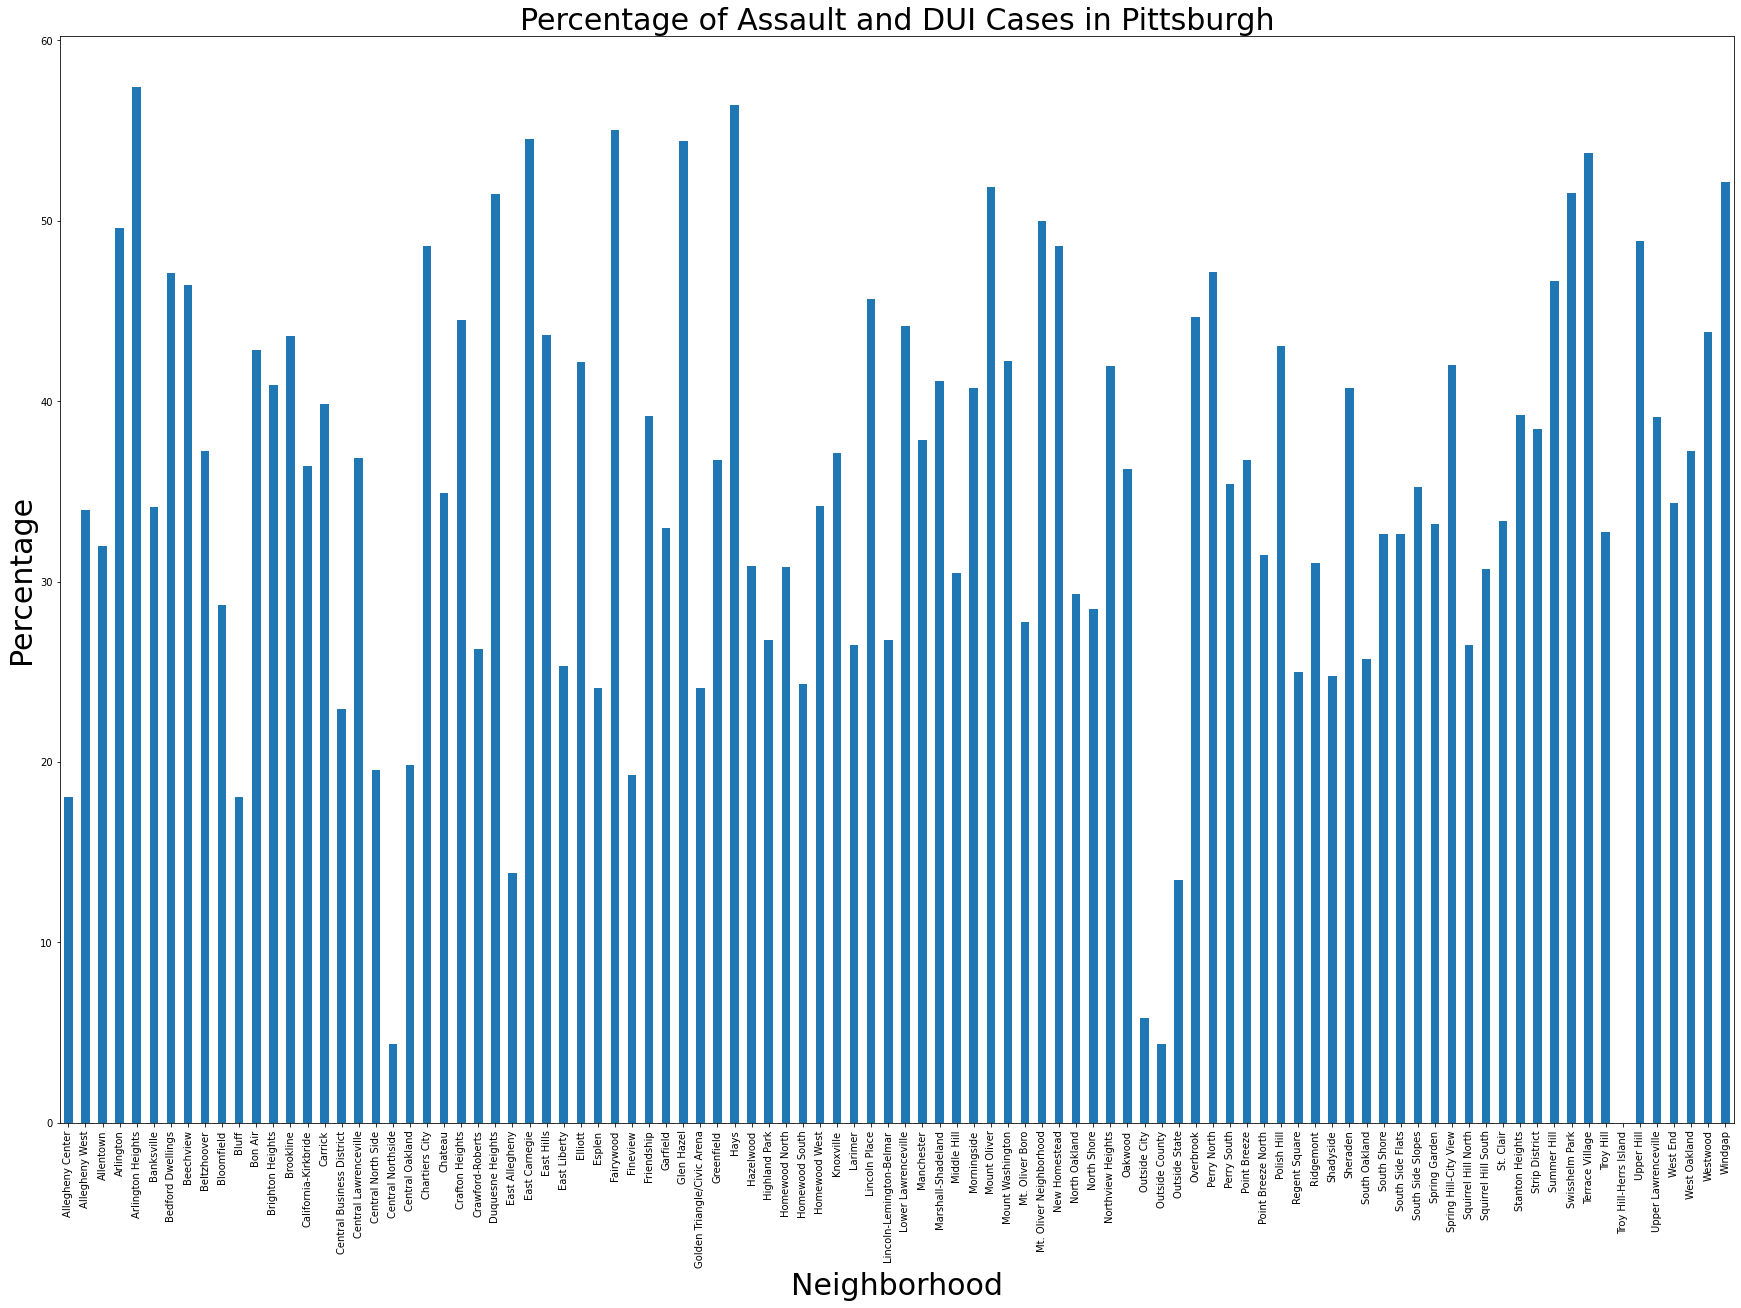

In [16]:
percent = (pd["INCIDENTNEIGHBORHOOD"].value_counts()/police_arrest["INCIDENTNEIGHBORHOOD"].value_counts()) * 100
percent.plot(kind = "bar", figsize = (30,20))
plt.title("Percentage of Assault and DUI Cases in Pittsburgh", fontsize = 30)
plt.ylabel("Percentage", fontsize = 30)
plt.xlabel("Neighborhood", fontsize = 30)

# Conclusions

<p>The neighborhoods in Pittsburgh that would be deemed the safest should have a low percentage in DUI and assault cases to the amount of arrest. Anything near 20% would be deemed relatively safe. According to the bar graph, the nieghborhoods with somewhere around 20% assault and DUI cases include Allegheny Center, Bluff, Central Northside, Central Oakland, East Allegheny, Fireview, Outside City, Outside City, and Outside County.</p>